# Email-Spam-Classifier

In [1]:
#importing warning to ignore future warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam (1).csv",encoding="cp437")

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [7]:
# There is very less values in last three column that's why dropping it
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1,inplace = True)

In [8]:
# Renaming Columns name 
data.rename({"v1":"Target","v2":"Text",},axis = 1,inplace = True)

In [9]:
data.sample(5)

,Target,Text
773,ham,I wil be there with in &lt;#&gt; minutes. Go...
3069,ham,I'm now but have to wait till 2 for the bus to...
2096,ham,I'm done...
2875,ham,Fuck cedar key and fuck her (come over anyway ...
3338,ham,Babe !!!! I LOVE YOU !!!! *covers your face in...


In [10]:
data.duplicated().sum()

403

In [11]:
# Dropping duplicate rows 
data.drop_duplicates(keep="first",inplace = True)

In [12]:
data.shape

(5169, 2)

In [13]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

# EDA

In [14]:
data["Target"].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

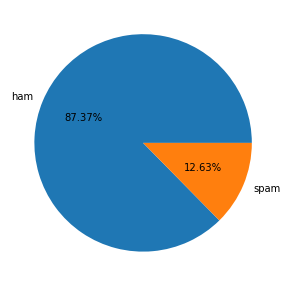

In [15]:
plt.figure(figsize = (11,5))
plt.pie(data["Target"].value_counts(),labels = ["ham","spam"],autopct="%.2f%%")
plt.show()

## Observation:- 87.37% mails are ham and 12.63% mails are spam and also data is imbalance

In [16]:
# Adding two columns one is for length of character and number of words
data["Length_of_character"] = data["Text"].apply(len)

In [17]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sony\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def tokenizer(text):
    text = nltk.word_tokenize(text)
    return len(text)
    

In [20]:
data["Number_of_words"] = data["Text"].apply(tokenizer)

In [21]:
data.sample(5)

,Target,Text,Length_of_character,Number_of_words
1025,ham,I have a sore throat. It's scratches when I talk,48,12
892,ham,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...,62,16
4264,ham,&lt;DECIMAL&gt; m but its not a common car he...,132,35
4048,ham,Yeah that's the impression I got,32,7
423,spam,URGENT! Your Mobile number has been awarded wi...,137,26


In [22]:
data.describe()

,Length_of_character,Number_of_words
count,5169.000000,5169.000000
mean,78.977945,18.453279
std,58.236293,13.324793
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [23]:
data[data["Target"] == "spam"].describe()

,Length_of_character,Number_of_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


# Observation:- Avarege 137 characters and 27 words have been used in spam messages.

In [24]:
data[data["Target"] == "ham"].describe()

,Length_of_character,Number_of_words
count,4516.000000,4516.000000
mean,70.459256,17.120903
std,56.358207,13.493725
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


# Observation:- Avarege 71 characters and 17 words have been used in ham messages.

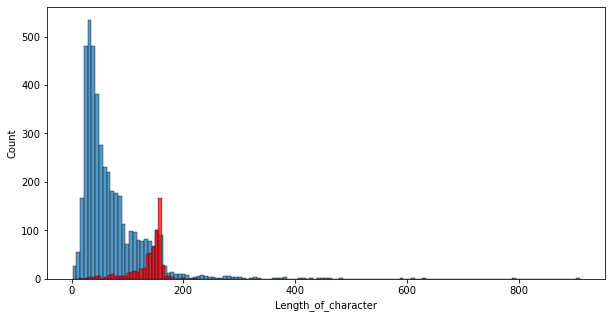

In [25]:
plt.figure(figsize = (10,5))
sns.histplot(data[data["Target"] == "ham"]["Length_of_character"])
sns.histplot(data[data["Target"] == "spam"]["Length_of_character"],color = "red");

# Observation :- In spam messages less number of characters have been used whereas in ham messages more number of characters have been used 

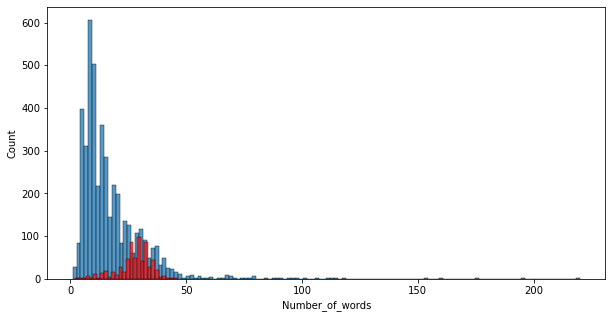

In [26]:
plt.figure(figsize = (10,5))
sns.histplot(data[data["Target"] == "ham"]["Number_of_words"])
sns.histplot(data[data["Target"] == "spam"]["Number_of_words"],color = "#f51414");

# Observation :- In spam messages less number of words have been used whereas in ham messages more number of words have been used. 








# Data pre-processing






In [27]:
data.head()

,Target,Text,Length_of_character,Number_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# Doing label_encoding of target column 

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["Target"] = LE.fit_transform(data["Target"])


In [54]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# nltk has 179 stop words but i am showing only 10
from nltk.corpus import stopwords
stop_word = stopwords.words("english")
print(stop_word[:10])
print(len(stop_word))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


In [31]:
# Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:

def Transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    # removing stop words
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # stemmimg the words
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [34]:
data["transformes_text"] = data["Text"].apply(Transformed_text)


In [35]:
data.sample(5)

,Target,Text,Length_of_character,Number_of_words,transformes_text
4868,0,1. Tension face 2. Smiling face 3. Waste face ...,158,36,tension face smile face wast face innoc face f...
1863,0,I'll let you know when it kicks in,34,9,let know kick
2316,0,That's cause your old. I live to be high.,41,12,caus old live high
5300,0,I can't make it tonight,23,6,ca make tonight
707,0,Quite late lar... Ard 12 anyway i wun b drivin...,49,12,quit late lar ard 12 anyway wun b drivin


# Model Building

## Feature Selection

In [36]:
x = data["transformes_text"]

In [37]:
x.sample(5)

712                                  08714712388 cost 10p
807                                 boooo alway work quit
665                     en chikku nang bakra msg kalstiya
5272    u u 2 u b move flat co need arrang pick lamp e...
4084    orang bring rington time chart hero free hit w...
Name: transformes_text, dtype: object

In [38]:
y = data["Target"]

In [39]:
y.sample(5)

3215    1
2407    0
3107    0
5254    0
373     0
Name: Target, dtype: int32

## Splitting data into train test

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 30)

In [41]:
x_train 

944     sent score sopha secondari applic school think...
2460                             cant talk call keep call
1964    honeybe said sweetest world god laugh amp said...
1947                     batteri mr adewal uncl aka egbon
4708             haha awesom might need take doin tonight
                              ...                        
5377    current lead bid paus auction send custom care...
939     better made friday stuf like pig yesterday fee...
508                                              signific
4139    leav wif lar wan carri meh heavi da num 983215...
4839    privat 2003 account statement show 800 point c...
Name: transformes_text, Length: 3876, dtype: object

In [42]:
x_test

1919    yar want 2 scold u yest late alreadi got zhong...
4263    broke list reason nobodi town ca tell sarcast ...
1717    wow boy r back take 2007 uk tour win vip ticke...
3617                                 hey check da list da
3375    good afternon love today hope good mayb interv...
                              ...                        
2381    best line said love wait till day forget u day...
3111                                         decid yet eh
4111                                      see prolli yeah
2409    aww first time u said u miss without ask miss ...
2571                               worri finish march ish
Name: transformes_text, Length: 1293, dtype: object

## converting text into frequencies of words using term frequency IDF 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
f_e = TfidfVectorizer(min_df = 1)

In [44]:
x_train = f_e.fit_transform(x_train)

In [45]:
print(x_train)

  (0, 1994)	0.23183334605809908
  (0, 3018)	0.22704991773454045
  (0, 3640)	0.27621392232296993
  (0, 3615)	0.26592423131474235
  (0, 2833)	0.21032439222409227
  (0, 1445)	0.16795978997112607
  (0, 665)	0.16795978997112607
  (0, 1471)	0.1863316442517205
  (0, 4189)	0.2444152774807356
  (0, 738)	0.19013609987064942
  (0, 5007)	0.28147654141299305
  (0, 4341)	0.3859180649557942
  (0, 739)	0.2533422998921059
  (0, 4365)	0.26592423131474235
  (0, 4631)	0.26592423131474235
  (0, 4343)	0.23183334605809908
  (0, 4392)	0.17000652250356255
  (1, 2889)	0.4541664012243376
  (1, 1184)	0.5788794815990143
  (1, 4910)	0.4715078852593599
  (1, 1207)	0.48611905940915023
  (2, 1492)	0.2722575055399187
  (2, 1953)	0.16215144095400752
  (2, 3378)	0.2502362926227365
  (2, 3397)	0.1631600937553707
  :	:
  (3873, 4499)	1.0
  (3874, 2029)	0.3745745215885826
  (3874, 518)	0.3745745215885826
  (3874, 1225)	0.3568519134607195
  (3874, 3575)	0.3265549147539402
  (3874, 3256)	0.3042270691005459
  (3874, 2496)	0.33

In [46]:
x_test = f_e.transform(x_test)

## Fitting data to naive bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

In [48]:
print(y_pred)

[0 0 1 ... 0 0 0]


## Fitting data to random forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = (40))
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test) 

In [50]:
print(y_pred2)

[0 0 1 ... 0 0 0]


## Evaluation of models

In [51]:
from sklearn.metrics import accuracy_score,precision_score

In [52]:
# evaluation of naive bayes
print("acccuracy of model:-"+ " " ,accuracy_score(y_test,y_pred))
print("precision of model:-"+ " " ,precision_score(y_test,y_pred))


acccuracy of model:-  0.9489559164733179
precision of model:-  1.0


In [53]:
#evaluation of random forest
print("acccuracy of model:-"+ " ",accuracy_score(y_test,y_pred2))
print("precision of model:-"+ " ",precision_score(y_test,y_pred2))


acccuracy of model:-  0.9644238205723125
precision of model:-  1.0
